In [2]:
import mpmath
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# constants
hbar = 1.055e-34  # Js
q = 1.602e-19  # C
m = 9.1e-31  # kg

In [4]:
# grid
Np = 100
a = 1e-10  # m
X = a * np.linspace(1, Np, Np) / 1e-9  # nm

In [5]:
# Define Hamiltonian as a tridiagonal matrix
t0 = (hbar * hbar) / (2 * m * a * a) / q  # divide by q to convert to eV
on = 2.0 * t0 * np.ones(Np)
off = -t0 * np.ones(Np - 1)

In [6]:
# Define 'particle in a box' potential# 
n1 = 25
n2 = 75
x1 = n1 * a / 1e-9
x2 = n2 * a / 1e-9
x1, x2

V0 = 0.5;  # eV
U = np.array(V0 * np.ones(n1))
U = np.append(U, np.zeros(n2 - n1))
U = np.append(U, V0 * np.ones(Np - n2))
U

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [7]:
# Define Hamiltonian
H = np.diag(on + U) + np.diag(off, 1) + np.diag(off, -1)
H

array([[ 8.1348589 , -3.81742945,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-3.81742945,  8.1348589 , -3.81742945, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -3.81742945,  8.1348589 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  8.1348589 ,
        -3.81742945,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -3.81742945,
         8.1348589 , -3.81742945],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -3.81742945,  8.1348589 ]])

In [8]:
# solve for eigenvalues and vectors
W, V = np.linalg.eig(H)
idx = W.argsort()[::1]
W = W[idx]
V = V[:, idx]

In [9]:
W

array([1.21683113e-02, 4.85205887e-02, 1.08562098e-01, 1.91309424e-01,
       2.94839680e-01, 4.14407623e-01, 5.24314380e-01, 5.55872162e-01,
       5.85778746e-01, 6.73147005e-01, 7.29659839e-01, 7.94290958e-01,
       9.00545598e-01, 9.91644567e-01, 1.07626481e+00, 1.19364909e+00,
       1.31861159e+00, 1.42771399e+00, 1.55046067e+00, 1.69747774e+00,
       1.83885174e+00, 1.97340555e+00, 2.12732986e+00, 2.29581436e+00,
       2.45548131e+00, 2.61497033e+00, 2.79380354e+00, 2.98051699e+00,
       3.15830452e+00, 3.33985198e+00, 3.53891644e+00, 3.74143226e+00,
       3.93565077e+00, 4.13574417e+00, 4.35112045e+00, 4.56687450e+00,
       4.77494646e+00, 4.98988095e+00, 5.21791608e+00, 5.44404379e+00,
       5.66286624e+00, 5.88885181e+00, 6.12594904e+00, 6.35931384e+00,
       6.58546259e+00, 6.81865646e+00, 7.06120567e+00, 7.29847180e+00,
       7.52832815e+00, 7.76485754e+00, 8.00923220e+00, 8.24694553e+00,
       8.47678611e+00, 8.71277410e+00, 8.95535984e+00, 9.19002937e+00,
      

In [10]:
V

array([[-2.47526490e-06, -6.65949208e-06,  1.67043621e-05, ...,
        -4.06264573e-02, -2.07384438e-02,  2.07386094e-02],
       [-5.26684544e-06, -1.41065884e-05,  3.51215837e-05, ...,
         7.92862716e-02,  4.12224741e-02, -4.12228032e-02],
       [-8.73147945e-06, -2.32220414e-05,  5.71401604e-05, ...,
        -1.14108001e-01, -6.12007983e-02,  6.12012869e-02],
       ...,
       [-8.73147945e-06,  2.32220414e-05,  5.71401604e-05, ...,
         1.14108051e-01, -6.12013103e-02, -6.12008180e-02],
       [-5.26684544e-06,  1.41065884e-05,  3.51215837e-05, ...,
        -7.92863064e-02,  4.12228190e-02,  4.12224874e-02],
       [-2.47526490e-06,  6.65949208e-06,  1.67043621e-05, ...,
         4.06264751e-02, -2.07386173e-02, -2.07384505e-02]])

In [11]:
# print eigenvalues and energy gaps
print(W[0:10])
Energy_gap = W[1] - W[0]
print(Energy_gap)

0.0363522773067469


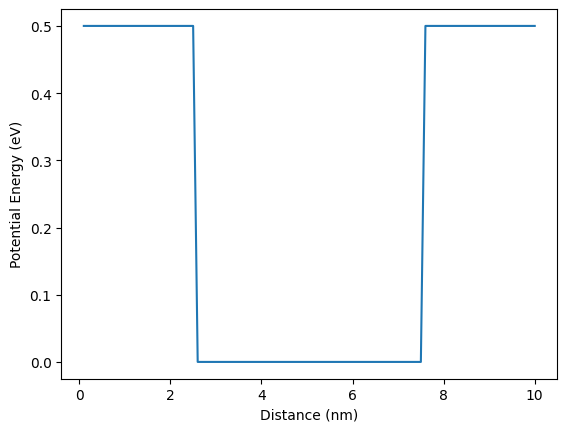

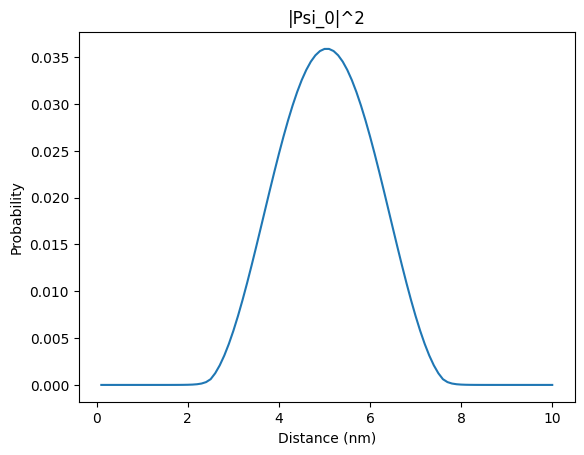

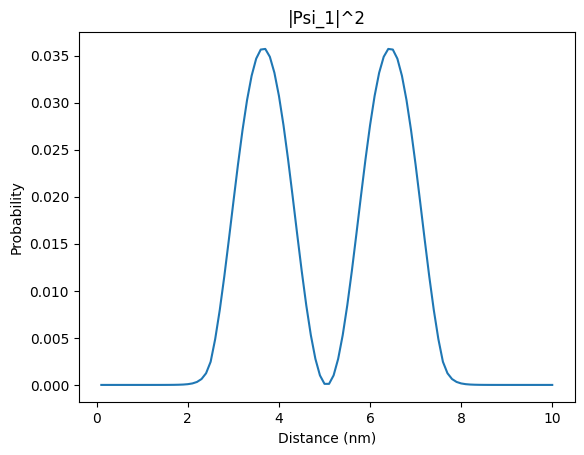

In [12]:
# calculate probability
Psi0 = np.multiply(V[:, 0], V[:, 0])
Psi1 = np.multiply(V[:, 1], V[:, 1])

plt.figure(1)
plt.plot(X, U)
plt.xlabel('Distance (nm)')
plt.ylabel('Potential Energy (eV)')
plt.show()

plt.figure(2)
plt.plot(X, Psi0)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title('|Psi_0|^2')
plt.show()

plt.figure(3)
plt.plot(X, Psi1)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title('|Psi_1|^2')
plt.show()